In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import fmin_l_bfgs_b

# Logistična regresija (univariatni primer)

Logistično regresijo smo razvili na enostavnem primeru z enim samim atributom. Ker gre za iskanje modela, ki izhodno spremenljivko y izračuna kot funkcijo ene same vhodne spremenljivke, problem imenujemo [univariatni](https://en.wikipedia.org/wiki/Univariate). V praksi bomo seveda delali s problemi z večimi atributi, torej z multivariatnimi probleme, a je univariaten čisto pučen ker ga je enostavno izrisati.

## Podatki

Pričnemo s podatki, ki jih bomo tokrat kar generirali. Na predavanjih smo omenili, da bi lahko razumeli tako domene kot napovedovanje, ali bo pri določeni temperaturi (vhodna spremenljivka x) deževalo (y=1) ali snežilo (y=0). Pozor: y je tu kategorična spremenljivka; v opisu problema zavzame namreč samo števno število vrednosti. V našem primeru zavzame dve možni vrednosti, ki pa jih v namene izračunljivosti predlaganega modela vseeno predstavimo številčno, torej z 0 in 1.

In [2]:
n1, n0 = 20, 30
X = np.concatenate((np.random.normal(0, 1, n0), np.random.normal(3, 1, n1)))
X = np.column_stack((np.ones(len(X)), X))
y = np.concatenate((np.zeros(n0), np.ones(n1)))

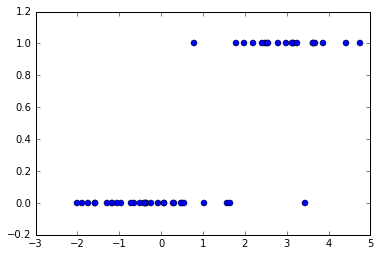

In [3]:
plt.plot(X[:,1], y, "o")
plt.ylim(-0.2, 1.2);

## Linearna regresija

Če je y predstavljena številčno, si bi morda lahko drznili podatke vseeno modelirati z linearno regresijo. Bolj za okus, saj je izhodna domena takega modela vsa realna števila. To pa za naš problem, ki je kategoričen, ni najbolje. Napovedani y bi sicer morda lahko razumeli kot neke vrste verjetnost, a imamo tudi tu probleme, saj je za nekatere vrednosti vhodnega atributa x izhod modela ali manjši od 0 ali pa večji kot 1. To bi sicer lahko v modelu popravili (kako?), a potem dobimo funkcijo, ki ni odvedljiva. Hujši problem pa bi bil dodatek primerov, ki recimo pravijo, da dežuje tudi pri visokih temperaturah. H kakšnim spremembam linerarne funkcije bi taki podatki vodili? V čem bi bil problem? 

Uf, zastavili smo vse polno vprašanj, model pa je pravzaprav preprost (čeprav, kot smo zgoraj nakazali, ne preveč uporaben). A vseeno, za vajo in ponovitev linearne regresije, sledi njena preprosta implementacije (brez regularizacije).

In [4]:
def J_lin(X, y, theta):
    return 0.5 * sum((X.dot(theta) - y)**2)

def dJ_lin(X, y, theta):
    return (X.dot(theta) - y).dot(X)

def lin(X, y):
    res = fmin_l_bfgs_b(lambda theta, X=X, y=y: J_lin(X, y, theta),
                        np.zeros(X.shape[1]).T,
                        lambda theta, X=X, y=y: dJ_lin(X, y, theta))
    return res[0]

In [5]:
theta = lin(X, y)

Zmislimo si dve točki (dve vrednosti atributa x), pri katerih izračunamo napoved (y). Zakaj smo že dodali kolono enic?

In [6]:
T = np.array([[1., -2], [1., 5]])

In [7]:
yt = T.dot(theta)

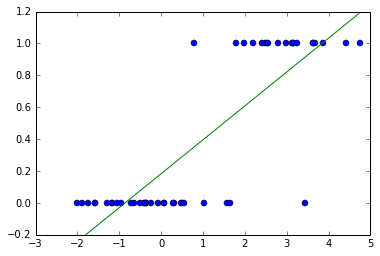

In [8]:
plt.plot(X[:,1], y, "o")
plt.ylim(-0.2, 1.2);
plt.plot(T[:,1], yt, "-");

Še prikaz uporabe modela za neko poljubno vrednost x-a:

In [9]:
np.array([1.0, -100]).dot(theta)

-21.074273790071032

## Logistična funkcija

V namene modeliranja bi bilo fino, da namesto dežja (y=1) ali snega (y=0) napovemo verjetnost dežja. Torej, rabimo model, ki za dano vrednost spremenljivke x vrne vrednost med 0 in 1. Fino je, če bi bila taka napovedna funkcija odvedljiva, torej gladka. To storimo tako, da linearno funkcijo zapakiramo v funkcijo g, sigmoidno funkcijo. Najprej določimo g, tako, da kot njen parameter lahko podamo tako skalar kot tudi vektor. Kaj ta funkcija vrne, če ji kot parameter podamo vektor?

In [10]:
def g(z):
    return 1 / (1 + np.exp(-z))

In [11]:
g(0), g(-10), g(10)

(0.5, 4.5397868702434395e-05, 0.99995460213129761)

In [12]:
g(np.array([0, -10, 10]))

array([  5.00000000e-01,   4.53978687e-05,   9.99954602e-01])

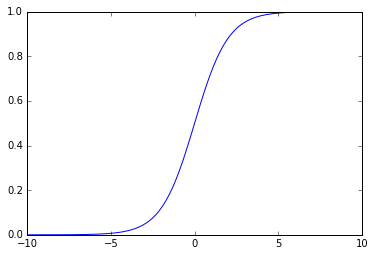

In [13]:
z = np.linspace(-10, 10, 100)
plt.plot(z, g(z));

## Logistična regresija, končno :-)

Zdaj pa zares. Na predavanjih smo izpeljali kriterijsko funkcijo in gradient za logistično regresijo. Implementacija obeh je spodaj. Uporabimo ju pri funkciji, ki nam izračuna parametre modela, tako, da je verjetnost opaženih učnih podatkov (X,y), če bi jih ta model generiral, največja.

In [14]:
def J_lr(X, y, theta):
    yh = g(X.dot(theta))
    return -sum(y*np.log(yh) + (1-y)*np.log(1-yh))

def dJ_lr(X, y, theta):
    return (g(X.dot(theta))-y).dot(X)

def lr(X, y):
    res = fmin_l_bfgs_b(lambda theta, X=X, y=y: J_lr(X, y, theta),
                        np.zeros(X.shape[1]),
                        lambda theta, X=X, y=y: dJ_lr(X, y, theta))
    return res[0]

Kakšne so koeficienti modela za naše podatke? Kakšna je funkcija, ki preslika vrednost atributa x v verjetnost za dež?

In [15]:
lr(X, y)

array([-3.3545414 ,  2.04832619])

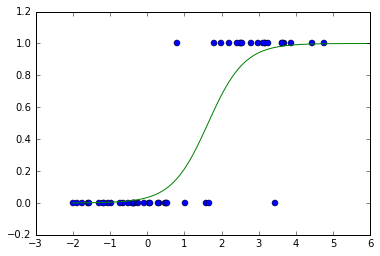

In [16]:
plt.plot(X[:,1], y, "o")
plt.ylim(-0.2, 1.2);
T = np.linspace(-2, 6, 100)
T = np.column_stack((np.ones(len(T)), T))
theta = lr(X, y)
plt.plot(T[:,1], g(T.dot(theta)));

## Kaj še?

Skušaj spremeniti podatke in opazuj, kaj se dogaja z modelom. Bi znal iz parametrov modela izračunati, pri katerem x ima P(y=1) vrednost 0.5? Zakaj je ta točka pomembna?